<a href="https://colab.research.google.com/github/ajayn3300/Movie-Recommender-content-based----NLP/blob/main/Movie_Recommender_Sytem~(Content_Based).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io
plt.rcParams["figure.figsize"] = (15,8)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Import

In [2]:
#data load
data=pd.read_csv('https://raw.githubusercontent.com/ajayn3300/Movie-Recommender-content-based----NLP/main/mymoviedb.csv',lineterminator="\n")

In [3]:
#data head
data

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


In [4]:
data.shape

(9827, 9)

In [5]:
#null values
data.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [6]:
#duplicates
data.duplicated().sum()

0

In [7]:
#data description
data.describe(include='all')

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
count,9827,9827,9827,9827.000000,9827.000000,9827.000000,9827,9827,9827
unique,5893,9513,9822,NaN,NaN,NaN,43,2337,9827
top,2022-03-10,Beauty and the Beast,Wilbur the pig is scared of the end of the sea...,NaN,NaN,NaN,en,Drama,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
freq,16,4,2,NaN,NaN,NaN,7570,466,1
mean,NaN,NaN,NaN,40.326088,1392.805536,6.439534,NaN,NaN,NaN
std,NaN,NaN,NaN,108.873998,2611.206907,1.129759,NaN,NaN,NaN
min,NaN,NaN,NaN,13.354000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,16.128500,146.000000,5.900000,NaN,NaN,NaN
50%,NaN,NaN,NaN,21.199000,444.000000,6.500000,NaN,NaN,NaN
75%,NaN,NaN,NaN,35.191500,1376.000000,7.100000,NaN,NaN,NaN


In [8]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


# EDA

In [9]:
#data.sample
data.sample(3)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
7599,2020-07-28,Legacy of Lies,An ex-MI6 agent is thrown back into the world ...,15.802,179,5.6,en,Thriller,https://image.tmdb.org/t/p/original/bhNHCeJDFD...
2666,2011-03-02,One Day,"A romantic comedy centered on Dexter and Emma,...",33.113,3436,7.4,en,"Drama, Romance",https://image.tmdb.org/t/p/original/xGclxjTTbO...
4453,2017-09-23,Brawl in Cell Block 99,After working as a drug courier and getting in...,22.769,1026,7.0,en,"Action, Crime, Thriller",https://image.tmdb.org/t/p/original/bfB1J6jsjd...


In [10]:
# column "Release_date " to datetime
data['Release_Date']=pd.to_datetime(data['Release_Date'])
data

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


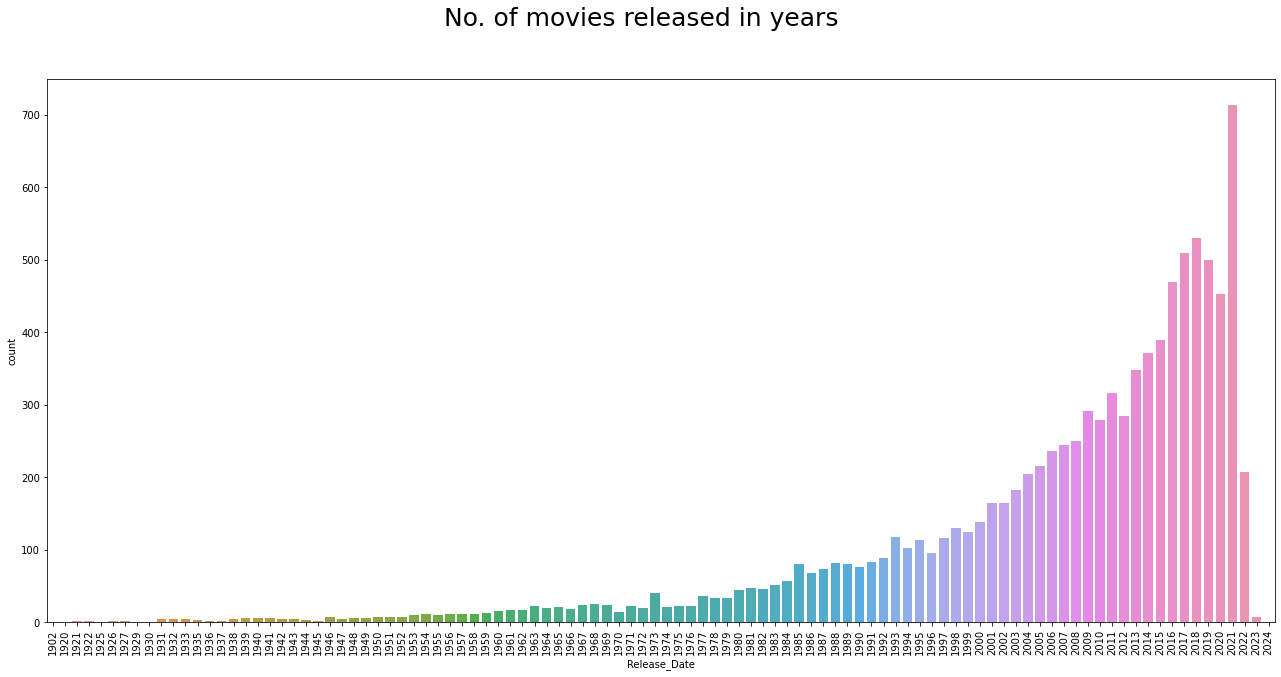

In [11]:
# no of movies release in years
sns.countplot(data.Release_Date.dt.year)
plt.xticks(rotation='vertical')
plt.suptitle('No. of movies released in years',fontsize=25)
plt.show()

          Most no. of movies were released in year 2021.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Top 10 Movies till year')

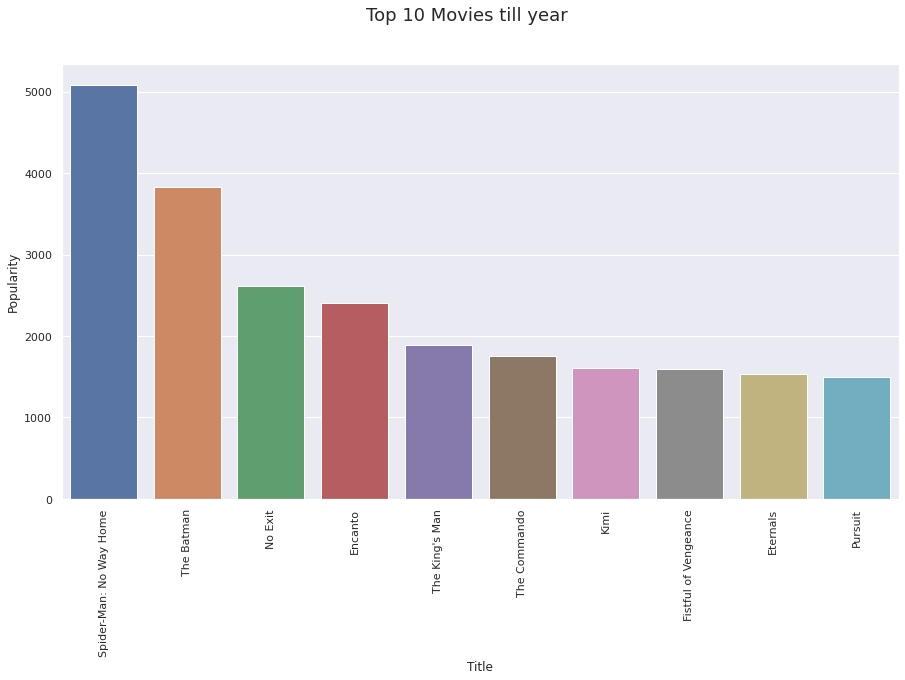

In [51]:
#top 10 movies
sns.set_theme(style="darkgrid")
sns.barplot(data.groupby('Title')['Popularity'].mean().sort_values(ascending=False).head(10).reset_index()['Title'],data.groupby('Title')['Popularity'].mean().sort_values(ascending=False).head(10).reset_index()['Popularity'])
plt.xticks(rotation='vertical')
plt.suptitle('Top 10 Movies till year',fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Languages in which most no. of movies are available')

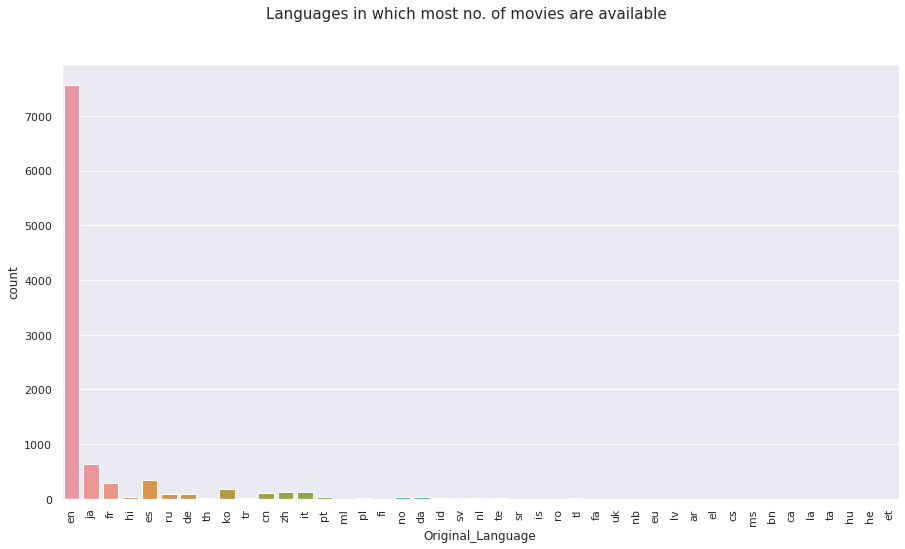

In [52]:
# in which language ,most no. of movies are available
sns.countplot(data.Original_Language)
plt.xticks(rotation='vertical')
plt.suptitle('Languages in which most no. of movies are available',fontsize=15)

      Most no. of movies are available in English language.

# Data Preprocessing

In [74]:
# let's keep only those columns which are needed
x=data.loc[:,['Title','Overview','Original_Language','Genre']]

In [75]:
# sample x
x.sample(5)

,Title,Overview,Original_Language,Genre
5306,Non Non Biyori: Vacation,The movie for Non Non Biyori series.\r Summer ...,ja,"Comedy, Animation, Adventure, Drama"
9578,The Family Stone,"An uptight, conservative businesswoman accompa...",en,"Comedy, Drama, Romance"
8830,Judy Moody and the Not Bummer Summer,Third-grader Judy Moody sets out to have the m...,en,"Comedy, Family"
5327,Heatwave,A woman's life takes an unexpected turn when s...,en,Thriller
3056,Gantz,After trying to rescue a man on the subway tra...,ja,"Horror, Action, Science Fiction"


In [78]:
# Let's do simple prerocess (NOTE : it won't remove stopwords)

# on Overview column
x['Overview']=x['Overview'].apply(simple_preprocess)

# on genre column
x['Genre']=x['Genre'].apply(simple_preprocess)


In [87]:
# Let's remove stopwords now
x['Overview']=x['Overview'].apply(lambda x :[i for i in x if i not in stopwords.words('english')])

In [94]:
' '.join(x.Overview[0])+' '.join(x.Genre[0])

'peter parker unmasked longer able separate normal life high stakes super hero asks help doctor strange stakes become even dangerous forcing discover truly means spider manaction adventure science fiction'

In [96]:
' '.join(x.Genre[0])

'action adventure science fiction'

In [97]:
' '.join(x.Overview[0])

'peter parker unmasked longer able separate normal life high stakes super hero asks help doctor strange stakes become even dangerous forcing discover truly means spider man'